In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import scipy.stats as sts

In [2]:
# Files to load
city_data_to_load = os.path.join("Resources", "city_data.csv")
ride_data_to_load = os.path.join("Resources", "ride_data.csv")

In [3]:
# Read the city and ride datafiles and store them to a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [4]:
# Inspecting the city data: Get the columns and the rows that are not null:
city_data_df.count()

# OR
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [5]:
# Get city data column type
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
# Get the number of data points from each city type.
print(sum(city_data_df["type"]=="Urban"))
print(sum(city_data_df["type"]=="Suburban"))
print(sum(city_data_df["type"]=="Rural"))

66
36
18


In [8]:
# Inspecting the ride data: Get the columns and the rows that are not null:
ride_data_df.count()

#OR
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [9]:
# Get ride data column type
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [10]:
# Merge the ride and city data
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [11]:
# Create the city type DataFrames.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [12]:
# Get the number of rides for each city type.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [13]:
# Get the average fare for each city type.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [14]:
# Get the average number of drivers for each city type.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

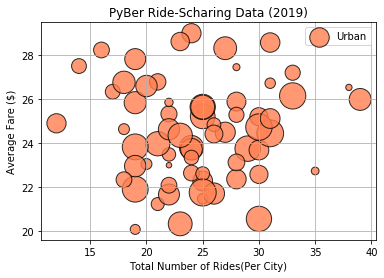

In [15]:
# Build the scatter plos for urban cities.
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, 
            label="Urban",
            color="coral",
           alpha=.8,
           linewidths=1,
           edgecolor="black")

# Add a title
plt.title("PyBer Ride-Scharing Data (2019)")
# Label the axes
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")
# Add gridlines
plt.grid()
# Add a legend
plt.legend()

plt.show()

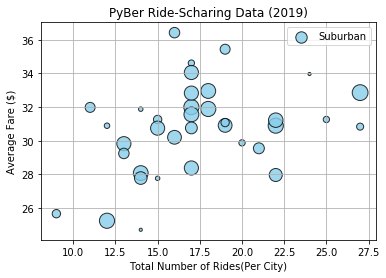

In [16]:
# Build the scatter plos for suburban cities.
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, 
            label="Suburban",
            color="skyblue",
           alpha=.8,
           linewidths=1,
           edgecolor="black")

# Add a title
plt.title("PyBer Ride-Scharing Data (2019)")
# Label the axes
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")
# Add gridlines
plt.grid()
# Add a legend
plt.legend()

plt.show()

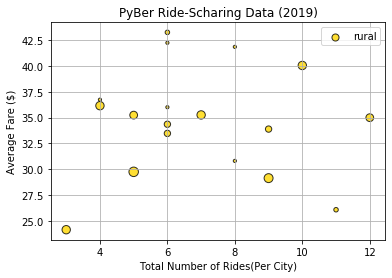

In [17]:
# Build the scatter plos for rural cities.
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, 
            label="rural",
            color="gold",
           alpha=.8,
           linewidths=1,
           edgecolor="black")

# Add a title
plt.title("PyBer Ride-Scharing Data (2019)")
# Label the axes
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")
# Add gridlines
plt.grid()
# Add a legend
plt.legend()

plt.show()

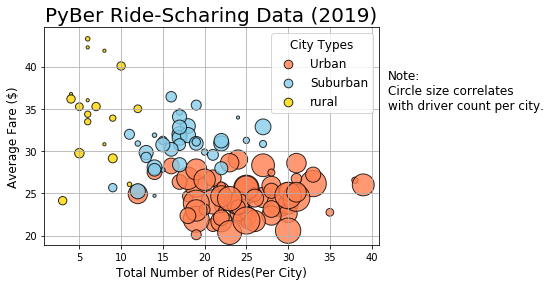

In [18]:
# Create a scatter chart for all 3 city types
# Build the scatter plos for urban cities.
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, 
            label="Urban",
            color="coral",
           alpha=.8,
           linewidths=1,
           edgecolor="black")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, 
            label="Suburban",
            color="skyblue",
           alpha=.8,
           linewidths=1,
           edgecolor="black")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, 
            label="rural",
            color="gold",
           alpha=.8,
           linewidths=1,
           edgecolor="black")

# Add a title
plt.title("PyBer Ride-Scharing Data (2019)", fontsize=20)
# Label the axes
plt.xlabel("Total Number of Rides(Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
# Add gridlines
plt.grid()
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Add a note about circle size
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")

# Save the figure
plt.savefig("analysis/Fig1.png", bbox_inches="tight")

In [19]:
# Get summary city type statistics.
print("urban\n", urban_cities_df.describe())
print("\nsuburban\n",suburban_cities_df.describe())
print("\nrural\n",rural_cities_df.describe())

urban
               fare       ride_id  driver_count
count  1625.000000  1.625000e+03   1625.000000
mean     24.525772  4.873485e+12     36.678154
std      11.738649  2.907440e+12     20.075545
min       4.050000  1.458810e+10      3.000000
25%      14.550000  2.400244e+12     22.000000
50%      24.640000  4.711188e+12     37.000000
75%      34.580000  7.451579e+12     52.000000
max      44.970000  9.991538e+12     73.000000

suburban
              fare       ride_id  driver_count
count  625.000000  6.250000e+02    625.000000
mean    30.970128  4.971015e+12     13.712000
std     10.677508  2.912410e+12      8.042372
min     12.050000  3.218337e+08      1.000000
25%     21.970000  2.364253e+12      5.000000
50%     30.750000  5.053221e+12     16.000000
75%     39.830000  7.551674e+12     21.000000
max     49.960000  9.917744e+12     25.000000

rural
              fare       ride_id  driver_count
count  125.000000  1.250000e+02    125.000000
mean    34.623440  4.647746e+12      4.296000

In [20]:
# Get summary ride count for each city type statistics.
print("urban\n", urban_ride_count.describe())
print("\nsuburban\n",suburban_ride_count.describe())
print("\nrural\n",rural_ride_count.describe())

urban
 count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

suburban
 count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

rural
 count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64


In [21]:
# Calculate the mean of the ride count for each city type
mean_ride_count = round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)
median_ride_count = round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)
mode_ride_count = round(urban_ride_count.mode()), round(suburban_ride_count.mode()), round(rural_ride_count.mode())

print("Mean:", mean_ride_count)
print("Median:", median_ride_count)
print("Mode:\n", mode_ride_count)

Mean: (24.62, 17.36, 6.94)
Median: (24.0, 17.0, 6.0)
Mode:
 (0    22
1    25
dtype: int64, 0    17
dtype: int64, 0    6
dtype: int64)


In [22]:
# Import NumPy and the stats module from SciPy. (did this in the opening dependencies)
# import numpy as np
# import scipy.stats as sts

In [23]:
# Calculate the measures of central tendency for the ride count for the city types.

# Urban:
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mode_urban_ride_count}.\n")

# Suburban:
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mode_suburban_ride_count}.\n")

# Rural:
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mode_rural_ride_count}.\n")

The mean for the ride counts for urban trips is 24.62.
The mean for the ride counts for urban trips is 24.0.
The mean for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).

The mean for the ride counts for suburban trips is 17.36.
The mean for the ride counts for suburban trips is 17.0.
The mean for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).

The mean for the ride counts for rural trips is 6.94.
The mean for the ride counts for rural trips is 6.0.
The mean for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).



In [24]:
# Get the measures of central tendancies for fares by city type.
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

# Urban
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.\n")

# Suburban
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.\n")

# Rural
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [25]:
# Get the measures of central tendancies for fares by driver count.
urban_drivers = urban_cities_df["driver_count"]
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

# Urban
mean_urban_driver_count = np.mean(urban_drivers)
print(f"The mean driver count for urban cities is {mean_urban_driver_count:.2f}.")

median_urban_driver_count = np.median(urban_drivers)
print(f"The median driver count for urban cities is {median_urban_driver_count:.2f}.")

mode_urban_driver_count = sts.mode(urban_drivers)
print(f"The mode driver count for urban cities is {mode_urban_driver_count}.\n")

# Suburban
mean_suburban_driver_count = np.mean(suburban_drivers)
print(f"The mean driver count for suburban cities is {mean_suburban_driver_count:.2f}.")

median_suburban_driver_count = np.median(suburban_drivers)
print(f"The median driver count for suburban cities is {median_suburban_driver_count:.2f}.")

mode_suburban_driver_count = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban cities is {mode_suburban_driver_count}.\n")

# Rural
mean_rural_driver_count = np.mean(rural_drivers)
print(f"The mean driver count for rural cities is {mean_rural_driver_count:.2f}.")

median_rural_driver_count = np.median(rural_drivers)
print(f"The median driver count for rural cities is {median_rural_driver_count:.2f}.")

mode_rural_driver_count = sts.mode(rural_drivers)
print(f"The mode driver count for rural cities is {mode_rural_driver_count}.")

The mean driver count for urban cities is 36.68.
The median driver count for urban cities is 37.00.
The mode driver count for urban cities is ModeResult(mode=array([39]), count=array([86])).

The mean driver count for suburban cities is 13.71.
The median driver count for suburban cities is 16.00.
The mode driver count for suburban cities is ModeResult(mode=array([20]), count=array([79])).

The mean driver count for rural cities is 4.30.
The median driver count for rural cities is 4.00.
The mode driver count for rural cities is ModeResult(mode=array([1]), count=array([32])).


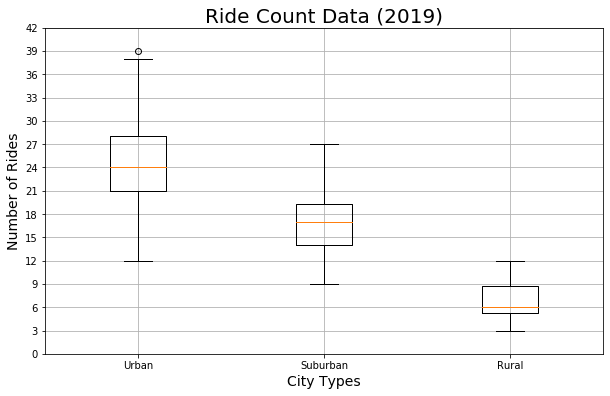

In [26]:
# Create a box and whisker plot for the cities ride count.
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

# Create box and whisker plot
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_count_data, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

plt.savefig("analysis/Fig2.png")
plt.show()

In [27]:
# Get the Urban outlier (39)
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


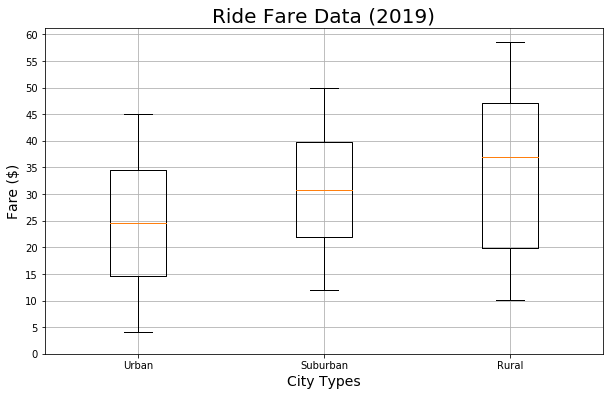

In [28]:
# Create a box and whiskers plot for ride fare data
x_labels = ["Urban", "Suburban", "Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]

# Create box and whisker plot
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_fare_data, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel("Fare ($)", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0, 65, step=5.0))
ax.grid()

plt.savefig("analysis/Fig3.png")
plt.show()

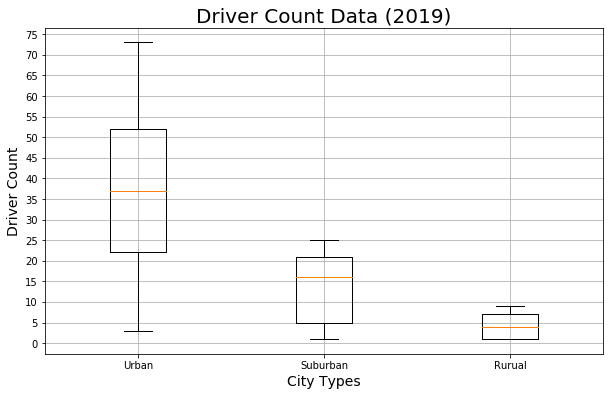

In [29]:
# Create a box and whiskers plot for driver count data
x_labels = ["Urban", "Suburban", "Rurual"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]

# Create box and whisker plot
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(driver_count_data,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title("Driver Count Data (2019)", fontsize=20)
ax.set_ylabel("Driver Count", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()

plt.savefig("analysis/Fig4.png")
plt.show()

In [30]:
# Calculate fare percentages by city type

total_fares = pyber_data_df["fare"].sum()

sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]

type_percents = 100 * sum_fares_by_type / total_fares

# OR
type_percents_alternate = 100* pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()

type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

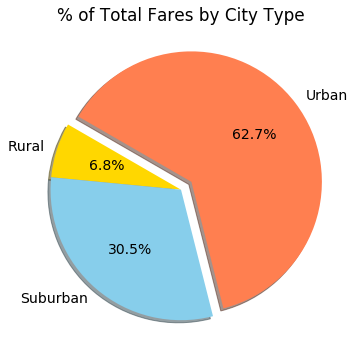

In [37]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

# Create a pie chart for fare percentages
plt.subplots(figsize=(10,6))
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "skyblue", "coral"],
       explode=[0, 0, .1],
       autopct="%.1f%%",
       shadow=True,
       startangle=150)

plt.title("% of Total Fares by City Type")

# Change the defaul font size from 10 to 14
mpl.rcParams['font.size'] = 14

# Save figure
plt.savefig("analysis/Fig5.png")
plt.show()

In [32]:
# Calculate ride percentages
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

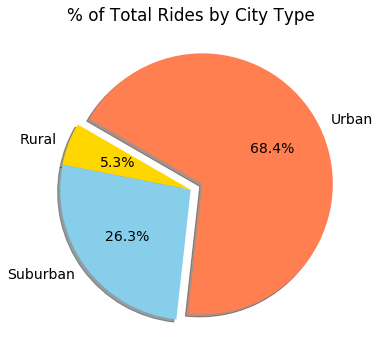

In [33]:
# Create a plot for ride percentages
plt.subplots(figsize=(10,6))
plt.pie(ride_percents, 
        labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "skyblue", "coral"],
       explode=[0, 0, .1],
       autopct="%.1f%%",
       shadow=True,
       startangle=150)

plt.title("% of Total Rides by City Type")

# Change the defaul font size from 10 to 14
mpl.rcParams['font.size'] = 14

# Save figure
plt.savefig("analysis/Fig6.png")
plt.show()

In [34]:
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [35]:
# Calculate driver percentages
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

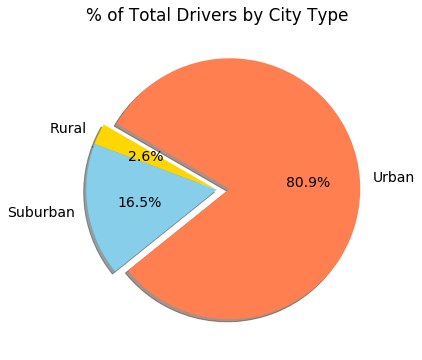

In [36]:
# Create a plot for driver percentages
plt.subplots(figsize=(10,6))
plt.pie(driver_percents, 
        labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "skyblue", "coral"],
       explode=[0, 0, .1],
       autopct="%.1f%%",
       shadow=True,
       startangle=150)

plt.title("% of Total Drivers by City Type")

# Change the defaul font size from 10 to 14
mpl.rcParams['font.size'] = 14

# Save figure
plt.savefig("analysis/Fig7.png")
plt.show()